In [1]:
import matplotlib.pyplot as plt
from   dlsAnalyzer       import *

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
dls               = dlsAnalyzer()
l                 = dls.loadExperiment("test.csv","test")
d                 = dls.experimentsOri["test"] 

d.lambda0         = 817                #  Laser wavelength in nanometers
d.scatteringAngle = 150 / 180 * np.pi  #  Angle of detection in radians
d.getQ()                               #  Calculate the Bragg wave vector
d.createFittingS_space(0.09,1e6,200)   #  Discretize the decay rate space we will use for the fitting
d.setAutocorrelationData()             

## Autocorrelation curves

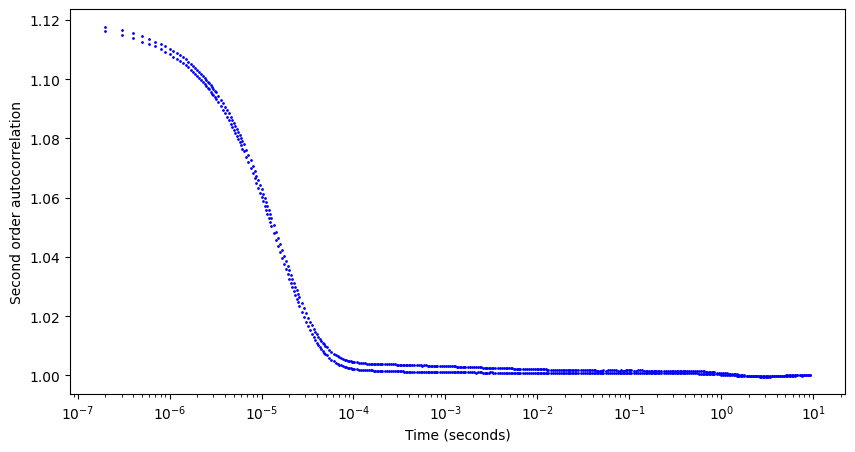

In [3]:
plt.xscale("log")
plt.plot(d.time,d.autocorrelation[:,0],'bo',markersize=1)
plt.plot(d.time,d.autocorrelation[:,1],'bo',markersize=1)
plt.xlabel("Time (seconds)")
plt.ylabel("Second order autocorrelation")
plt.show()

/home/filip/Projekte/dynamiclightscatteringanalysis/helpers.py:80: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt( (g2-1) / beta) # unitless


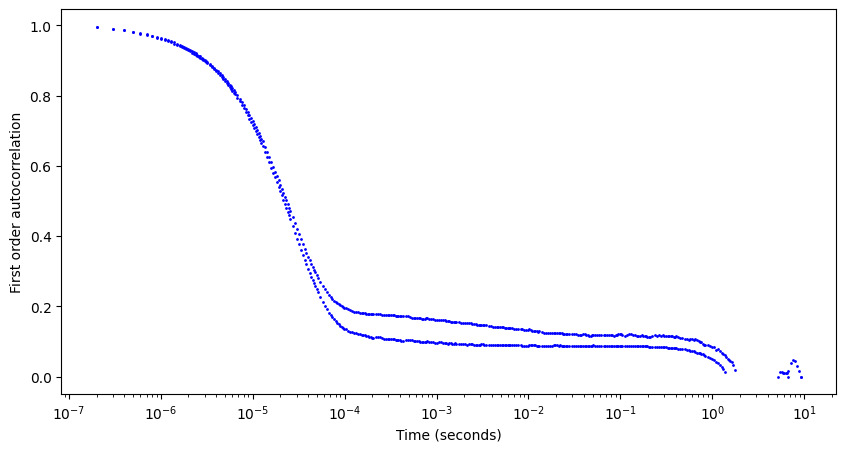

In [4]:
# Estimate the intercept of the second order autocorrelation curves
d.getBetaEstimate()   

# Compute  the first order autocorrelation curves
# Due to errors in measurement, same values can't be computed (negative sqrt)

d.getG1correlation()  

plt.xscale("log")
 
plt.plot(d.time,d.g1[:,0],'bo',markersize=1)
plt.plot(d.time,d.g1[:,1],'bo',markersize=1)
plt.xlabel("Time (seconds)")
plt.ylabel("First order autocorrelation")
plt.show()

## Fit the DLS data

In [5]:
d.getInitialEstimates()
d.getInitialEstimatesManyAlpha()
d.getOptimalAlphaLcurve()
d.getInitialEstimatesOptimalAlphaLcurve()
d.getInitialEstimatesManyAlpha()

ResNorm: [0.06396787 0.06396788 0.06396789 0.06396792 0.06396794 0.06396799
 0.06396804 0.06396812 0.06396823 0.06396837 0.06396858 0.06396886
 0.06396925 0.06396978 0.06397052 0.06397154 0.06397294 0.06397488
 0.06397755 0.06398123 0.06398631 0.06399331 0.06400296 0.06401624
 0.06403453 0.06405779 0.06408434 0.06411657 0.06415671 0.064195
 0.06423002 0.06426469 0.06430211 0.06434592 0.06440048 0.06446732
 0.0645434  0.06463158 0.06471813 0.0648064  0.06490405 0.06501971
 0.0651507  0.06530245 0.06546772 0.06564744 0.06585141 0.06607878
 0.06633769 0.0666274  0.06694993 0.06732093 0.06773489 0.06820734
 0.06873326 0.06933203 0.07000606 0.070768   0.07162371 0.07258247
 0.07367344 0.0748942  0.07625687 0.07779955 0.07952104 0.08144067
 0.08359668 0.08598614 0.08866695 0.09168358 0.09508578 0.09893634
 0.10321811 0.10804254 0.11336273 0.11930567 0.12582383 0.13304346
 0.1409339  0.14959268]
ContNorm: [0.96158246 0.96158166 0.96158055 0.96157903 0.96157693 0.96157403
 0.96157002 0.9615645

## L-curve 

Text(0, 0.5, 'Log(penalty term)')

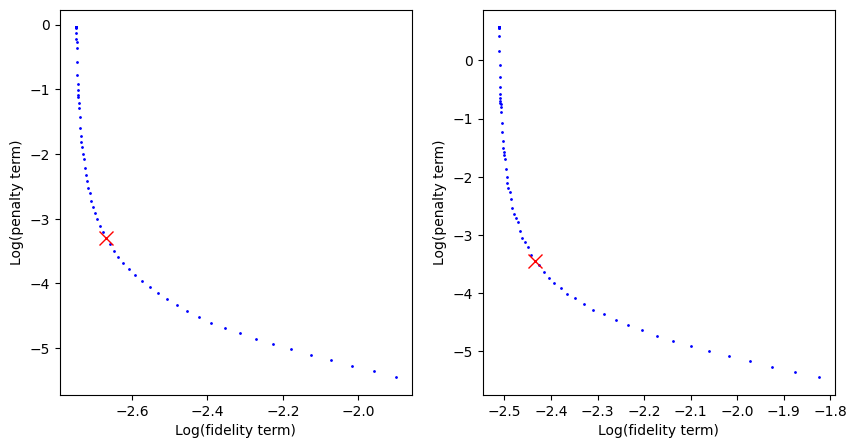

In [6]:
figure, axis = plt.subplots(1, 2)

axis[0].plot(np.log(d.curvesResidualNorm[:,0]),np.log(d.curvesPenaltyNorm[:,0]),'bo',markersize=1)
axis[0].plot(np.log(d.curvesResidualNorm[:,0])[d.alphaOptIdx[0]],
         np.log(d.curvesPenaltyNorm[:,0])[d.alphaOptIdx[0]],'x',color='red',markersize=10)

axis[0].set_xlabel("Log(fidelity term)")
axis[0].set_ylabel("Log(penalty term)")

axis[1].plot(np.log(d.curvesResidualNorm[:,1]),np.log(d.curvesPenaltyNorm[:,1]),'bo',markersize=1)
axis[1].plot(np.log(d.curvesResidualNorm[:,1])[d.alphaOptIdx[1]],
         np.log(d.curvesPenaltyNorm[:,1])[d.alphaOptIdx[1]],'x',color='red',markersize=10)

axis[1].set_xlabel("Log(fidelity term)")
axis[1].set_ylabel("Log(penalty term)")

## Fitted curves

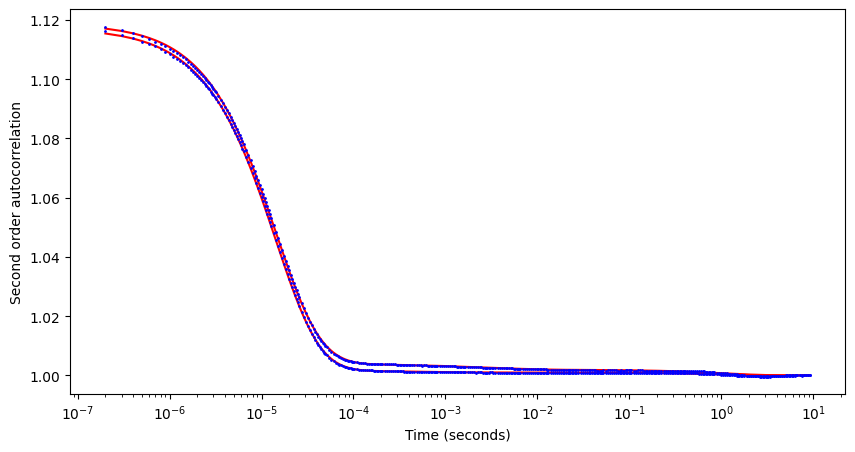

In [7]:
d.predictAutocorrelationCurves()

plt.xscale("log")

plt.plot(d.time,d.autocorrelationPredicted[:,0],'red')
plt.plot(d.time,d.autocorrelationPredicted[:,1],'red')
plt.plot(d.time,d.autocorrelation[:,0],'bo',markersize=1)
plt.plot(d.time,d.autocorrelation[:,1],'bo',markersize=1)

plt.xlabel("Time (seconds)")
plt.ylabel("Second order autocorrelation")
plt.show()

## Hydrodynamic radius distribution

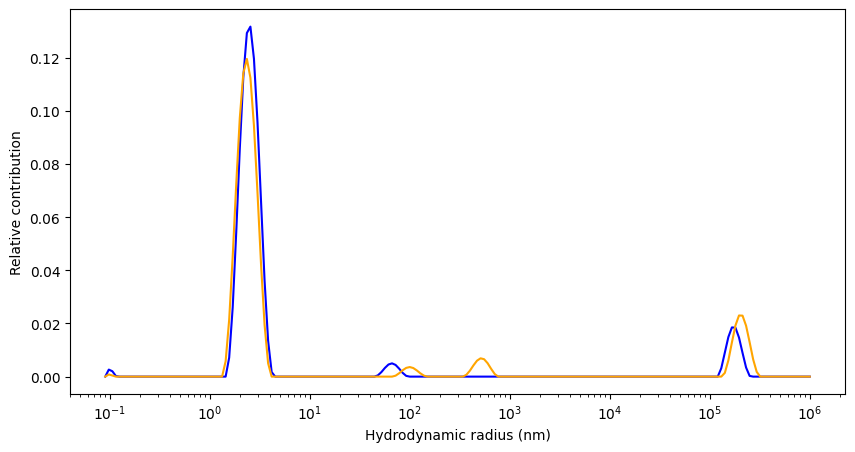

In [8]:
plt.xscale("log")

plt.plot(d.hrs,d.contributionsGuess[0],'blue')
plt.plot(d.hrs,d.contributionsGuess[1],'orange')

plt.xlabel("Hydrodynamic radius (nm)")
plt.ylabel("Relative contribution")
plt.show()